In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image
from datetime import date

from tqdm import tqdm
import os 

In [2]:
# Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]
Years = ['2000']
N_year = len(Years)

Months = []
for imon in range(1,2): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000']
['01']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Lats_edge = np.arange(-90,91,6)
Lons_edge = np.arange(-180,181,10)

Lats_mid = np.arange(-87,90,6)
Lons_mid = np.arange(-175,180,10)
# Levs = [100, 75, 65, 55, 40, 30]
# Heights = [16, 18, 19, 20, 22, 24]
# [100, 75, 55, 40, 30]


N_lat = len(Lats_mid)
N_lon = len(Lons_mid)
N_lev = 1 # len(Levs) # 16, 18, 19, 20, 22, 24 km

Lats_edge, Lons_edge, Lats_mid, Lons_mid, N_lat, N_lon, Lons_edge[-1]

(array([-90, -84, -78, -72, -66, -60, -54, -48, -42, -36, -30, -24, -18,
        -12,  -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,
         66,  72,  78,  84,  90]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 array([-87, -81, -75, -69, -63, -57, -51, -45, -39, -33, -27, -21, -15,
         -9,  -3,   3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,
         69,  75,  81,  87]),
 array([-175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,
         -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,
          45,   55,   65,   75,   85,   95,  105,  115,  125,  135,  145,
         155,  165,  175]),
 30,
 36,
 180)

In [19]:
# count the particle (injected at different height) number in each grid cell
N_day = 366+30
Num_2D_fine = np.zeros((N_lat, N_lon, N_lev, N_day)) 
Num_2D_Coarse = np.zeros((N_lat, N_lon, N_lev, N_day)) 

for i_year in tqdm(range(N_year)):
    # File = open('/n/home12/hongwei/Paper_2/Plot_python/Num_Concnt/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
        
    # total
    File = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_High_Resolution_Injection/Num_Concnt_data/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
    
    Lines = File.readlines()
    
    NUMs = np.zeros((N_lon*N_lat*N_day, N_lev))
    
    ii = 0
    for line in Lines:
        a = line.split(',')
        NUMs[ii,0] = float(a[3])
        ii = ii+1
    

    Num_2D_temp = np.zeros((N_lat, N_lon, N_lev, N_day)) 
    for i_day in range(N_day):
        for ix in range(N_lon):
            for iy in range(N_lat):
                ii = i_day*(N_lat*N_lon) + ix*N_lat + iy
                Num_2D_temp[iy, ix, :, i_day] = NUMs[ii,:]
               
            
    Num_2D_fine = Num_2D_fine + Num_2D_temp
    
print(ii)


for i_year in tqdm(range(N_year)):
    # File = open('/n/home12/hongwei/Paper_2/Plot_python/Num_Concnt/Num_Concnt_2000_'+Years[i_year]+'.txt', 'r')
        
    # total
    File = open('/n/home12/hongwei/Paper_3_QBO/Particle_Number_High_Resolution_Injection/Num_Concnt_data/Num_Concnt_Coarse_2000_'+Years[i_year]+'.txt', 'r')
    
    Lines = File.readlines()
    
    NUMs = np.zeros((N_lon*N_lat*N_day, N_lev))
    
    ii = 0
    for line in Lines:
        a = line.split(',')
        NUMs[ii,0] = float(a[3])
        ii = ii+1
    

    Num_2D_temp = np.zeros((N_lat, N_lon, N_lev, N_day)) 
    for i_day in range(N_day):
        for ix in range(N_lon):
            for iy in range(N_lat):
                ii = i_day*(N_lat*N_lon) + ix*N_lat + iy
                Num_2D_temp[iy, ix, :, i_day] = NUMs[ii,:]
               
            
    Num_2D_Coarse = Num_2D_Coarse + Num_2D_temp

100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


427679


100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


In [20]:
print("LAT Before: ", Lats_mid)

if Lats_mid[0]<Lats_mid[-1]:
    Lats_edge = Lats_edge[::-1]
    Lats_mid = Lats_mid[::-1]
    Num_2D_fine[:, :, :, :] = Num_2D_fine[::-1, :, :, :]
    Num_2D_Coarse[:, :, :, :] = Num_2D_coarse[::-1, :, :, :]

print("LAT After: ", Lats_mid)

LAT Before:  [ 87  81  75  69  63  57  51  45  39  33  27  21  15   9   3  -3  -9 -15
 -21 -27 -33 -39 -45 -51 -57 -63 -69 -75 -81 -87]
LAT After:  [ 87  81  75  69  63  57  51  45  39  33  27  21  15   9   3  -3  -9 -15
 -21 -27 -33 -39 -45 -51 -57 -63 -69 -75 -81 -87]


11
(30, 36)
(30, 36)
0.8616400705676664


<ipython-input-67-83cf901cd251>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


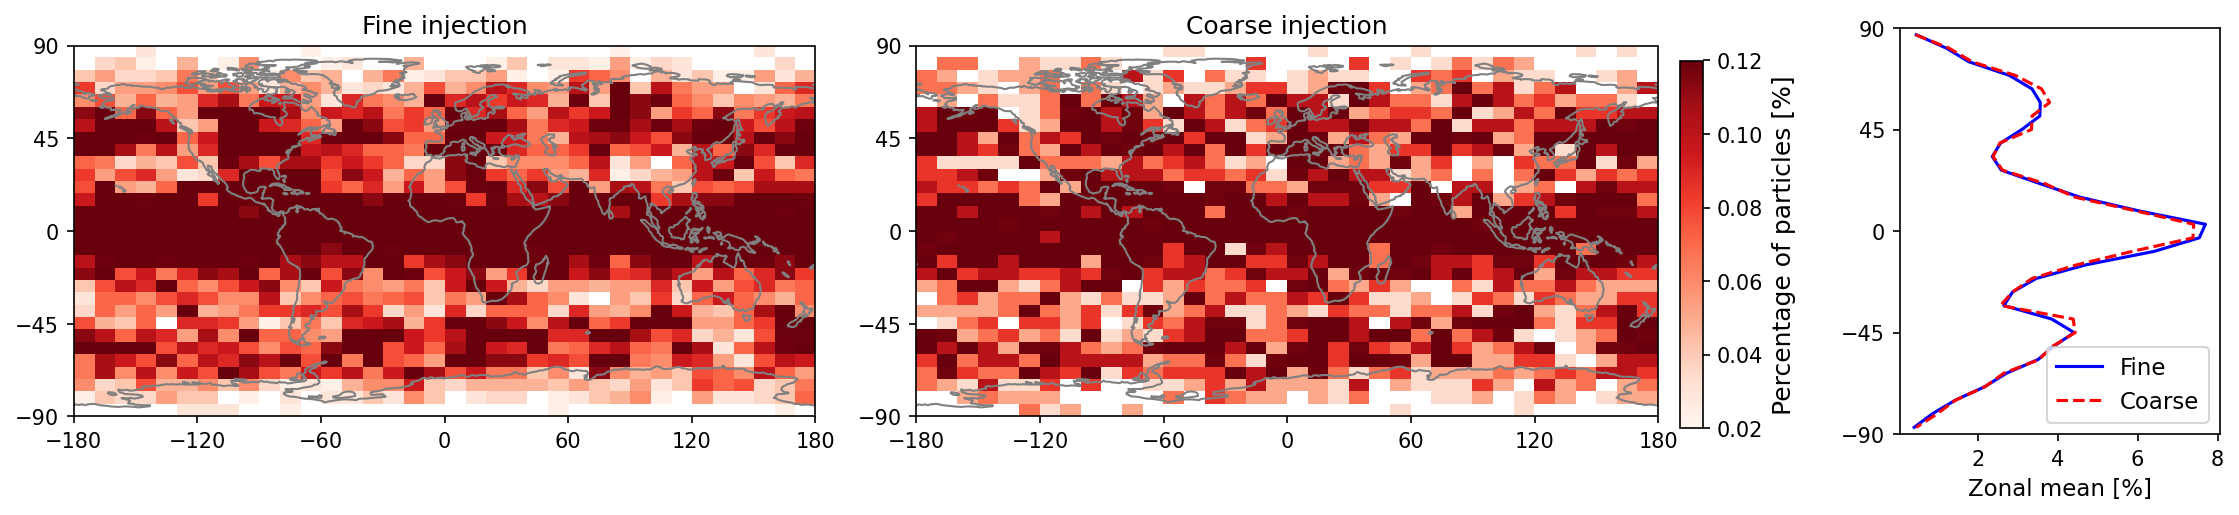

In [67]:
from copy import copy

fig = plt.figure(figsize=(15,3.5), dpi=150)
gs = gridspec.GridSpec(1, 16, figure=fig)
projection = crs.PlateCarree()

Num_min = 0.02
Num_max = 0.12
extent = [-180 , 180 , 90 , -90]

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)
print(11)

iday = 365

###
ax1 = fig.add_subplot(gs[0, 0:6], projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)

data1 = 100*Num_2D_fine[:,:,0,iday]/np.sum(Num_2D_fine[:,:,0,iday], axis=(0,1))
ax1_pixel = plt.imshow(data1, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

# cax1 = fig.add_axes([0.5, 0.15, 0.01, 0.7])    
# cb1  = plt.colorbar(ax1_pixel, cax=cax1, ax=ax1, orientation="vertical")
# cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation="horizontal")

cb1.set_label('Particles per month', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.set_title('Fine injection')

print(data1.shape)


###
ax2 = fig.add_subplot(gs[0, 6:12], projection=projection)

ax2.set_global()
ax2.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)

data2 = 100*Num_2D_Coarse[:,:,0,iday]/np.sum(Num_2D_Coarse[:,:,0,iday], axis=(0,1))
ax2_pixel = plt.imshow(data2, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

cax2 = fig.add_axes([0.75, 0.18, 0.01, 0.7])    
cb2  = plt.colorbar(ax2_pixel, cax=cax2, ax=ax2, orientation="vertical")
# cb2 = plt.colorbar(ax2_pixel, ax=ax2, orientation="horizontal")

cb2.set_label('Percentage of particles [%]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax2.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax2.set_title('Coarse injection')

print(data2.shape)


###
ax3 = fig.add_subplot(gs[0, 13:16])

data1_all = np.mean( data1[:,:], axis=(1) )
data2_all = np.mean( data2[:,:], axis=(1) )
r = np.corrcoef(data1_all, data2_all)
r2 = np.corrcoef(data1.flatten(),data2.flatten())
print(r2[0,1])

ax3.plot(100*data1_all[:]/np.sum(data1_all[:]), Lats_mid, 'b-',  label="Fine")
ax3.plot(100*data2_all[:]/np.sum(data2_all[:]), Lats_mid, 'r--',  label="Coarse")

ax3.set_ylim(-90,90)
ax3.set_yticks((-90,-45,0,45,90))
# ax3.set_yticklabels(-90,-45,0,45,90)

ax3.set_xlabel("Zonal mean [%]", fontsize=11);
# ax3.set_title(f"R={r[0,1]:.3f}");

ax3.legend(fontsize=11, loc='lower right');

plt.tight_layout();

In [2]:
Lats_edge = np.arange(-90,91,6)
Lons_edge = np.arange(-180,181,10)
# Levs_edge = np.arange(75,450,50)

Lats_mid = np.arange(-87,90,6)
Lons_mid = np.arange(-175,180,10)
# Levs_mid = np.arange(100,450,50)


N_lat = len(Lats_mid)
N_lon = len(Lons_mid)
N_lev = 1 # len(Levs_mid) 

Lats_edge, Lons_edge, Lats_mid, Lons_mid, N_lat, N_lon, Lons_edge[-1]

(array([-90, -84, -78, -72, -66, -60, -54, -48, -42, -36, -30, -24, -18,
        -12,  -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,
         66,  72,  78,  84,  90]),
 array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 array([-87, -81, -75, -69, -63, -57, -51, -45, -39, -33, -27, -21, -15,
         -9,  -3,   3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,
         69,  75,  81,  87]),
 array([-175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,  -75,
         -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,   35,
          45,   55,   65,   75,   85,   95,  105,  115,  125,  135,  145,
         155,  165,  175]),
 30,
 36,
 180)

In [3]:
# calculate the area of lon-lat grid [km^2]
def Area_Lat_Weghted(lat1, lat2, d_lon):
    # A = π R² (sin φ1 − sin φ2) (θ1 − θ2)/180.
    Re = 6378 # km
    Area = math.pi * Re**2 * abs(np.sin(np.deg2rad(lat1))-np.sin(np.deg2rad(lat2))) * d_lon/180
    return Area

In [4]:
Grid_area = np.zeros((N_lat, N_lon))

for iy in range(N_lat):
    Grid_area[iy,:] = Area_Lat_Weghted( Lats_edge[iy], Lats_edge[iy+1], abs(Lons_mid[1]-Lons_mid[0]) )

In [5]:
Grid_area

array([[ 38893.47256424,  38893.47256424,  38893.47256424, ...,
         38893.47256424,  38893.47256424,  38893.47256424],
       [116254.29266832, 116254.29266832, 116254.29266832, ...,
        116254.29266832, 116254.29266832, 116254.29266832],
       [192341.40641415, 192341.40641415, 192341.40641415, ...,
        192341.40641415, 192341.40641415, 192341.40641415],
       ...,
       [192341.40641415, 192341.40641415, 192341.40641415, ...,
        192341.40641415, 192341.40641415, 192341.40641415],
       [116254.29266832, 116254.29266832, 116254.29266832, ...,
        116254.29266832, 116254.29266832, 116254.29266832],
       [ 38893.47256424,  38893.47256424,  38893.47256424, ...,
         38893.47256424,  38893.47256424,  38893.47256424]])

In [6]:

Total_Mon = 20*12
Sink_num = np.zeros((N_lat, N_lon, N_lev, Total_Mon))

File = open('/n/home12/hongwei/Paper_3_QBO/Sink_locations/Num_Sinks_Within_15deg_19km.txt', 'r')

Lines = File.readlines()

Months = []
Lons = []
Lats = []
Sink0 = []
Sink1 = []
Sink2 = []
Sink3 = []
Sink4 = []
Sink5 = []
Sink6 = []

for line in Lines:
    a = line.split(',')
    Months.append(float(a[0]))
    Lons.append(float(a[1]))
    Lats.append(float(a[2]))
    
    Sink0.append(float(a[3]))
    Sink1.append(float(a[4]))
    Sink2.append(float(a[5]))
    Sink3.append(float(a[6]))
    Sink4.append(float(a[7]))
    Sink5.append(float(a[8]))
    Sink6.append(float(a[9]))
    
    
i = 0
for i_MON in range(Total_Mon):
    for ix in range(N_lon):
        for iy in range(N_lat):
            Sink_num[iy, ix, :, i_MON]=np.array([Sink0[i],Sink1[i],Sink2[i],Sink3[i],Sink4[i],Sink5[i],Sink6[i]])
            i = i+1

Sink_num.shape


(30, 36, 7, 240)

In [7]:
np.sum(Sink_num)/(10*(360/3))/6, N_lat

(44.0, 30)

## Figure 3: number flux from stratosphere from troposphere

In [8]:
#  get 2005.1 - 2009.12

# 19 km
Sink_num_steady = np.sum(Sink_num[:,:,:,5*12:10*12],axis=2)
Sink_num_steady.shape

(30, 36, 60)

In [9]:
iy_polar = list(np.arange(0,5,1))+list(np.arange(25,30,1))
iy_midlat = list(np.arange(5,10,1))+list(np.arange(20,25,1))
iy_tropic = list(np.arange(10,20,1))

Lats_mid[iy_polar], Lats_mid[iy_midlat], Lats_mid[iy_tropic]

(array([-87, -81, -75, -69, -63,  63,  69,  75,  81,  87]),
 array([-57, -51, -45, -39, -33,  33,  39,  45,  51,  57]),
 array([-27, -21, -15,  -9,  -3,   3,   9,  15,  21,  27]))

In [10]:
# sum: particles per month for all injection locations

Num_month_tropic = np.sum(Sink_num_steady[iy_tropic,:,:], axis=(0,1))
Num_month_midlat = np.sum(Sink_num_steady[iy_midlat,:,:], axis=(0,1))
Num_month_polar = np.sum(Sink_num_steady[iy_polar,:,:], axis=(0,1))

Num_tropic_MonMean = np.mean(Num_month_tropic)
Num_midlat_MonMean = np.mean(Num_month_midlat)
Num_polar_MonMean = np.mean(Num_month_polar)

print(Num_tropic_MonMean, Num_midlat_MonMean, Num_polar_MonMean)

total = Num_tropic_MonMean+Num_midlat_MonMean+Num_polar_MonMean

print("The percentage of particle number sink in tropical, mid-lat, and polar are:")
print(f"{ Num_tropic_MonMean/total:.2f}, { Num_midlat_MonMean/total:.2f}, { Num_polar_MonMean/total:.2f}")

Num_tropic_MonMean+Num_midlat_MonMean+Num_polar_MonMean, 21*24*10

521.55 1762.0333333333333 342.68333333333334
The percentage of particle number sink in tropical, mid-lat, and polar are:
0.20, 0.67, 0.13


(2626.2666666666664, 5040)

## Discussion: for injection only at equator

In [11]:
iy_tropic, Lats_mid[iy_tropic]

([10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 array([-27, -21, -15,  -9,  -3,   3,   9,  15,  21,  27]))

In [12]:
iy_equator=14
Lats_mid[iy_equator]

-3

# QBO

In [13]:
import pywt
import scipy.signal as Signal
# from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

[-87 -81 -75 -69 -63]
(240,)


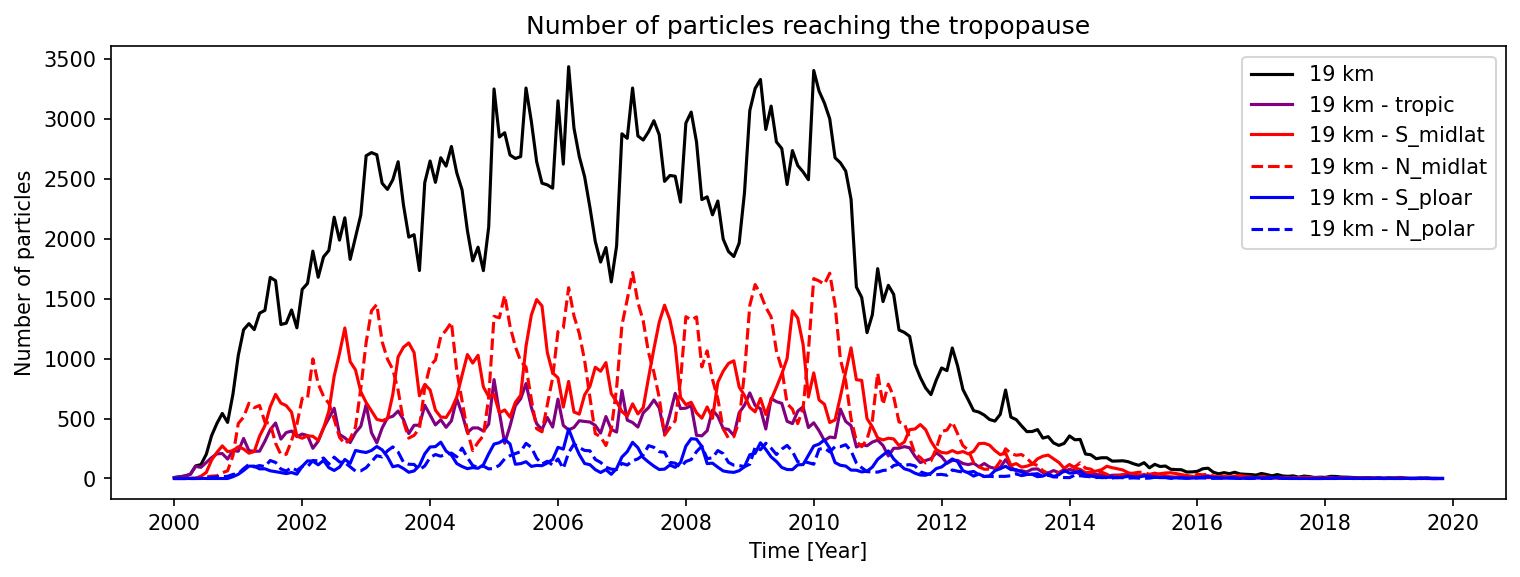

In [15]:
#------------------------------------------------------------------
# plot the time series of the total particle number
#------------------------------------------------------------------

iy_S_polar  = list(np.arange(0,5,1))
iy_S_midlat = list(np.arange(5,10,1))
iy_tropic   = list(np.arange(10,20,1))
iy_N_midlat = list(np.arange(20,25,1))
iy_N_polar  = list(np.arange(25,30,1))
print(Lats_mid[iy_S_polar])

Heights = [20]

sink_num_month = np.sum( Sink_num, axis=(0,1,2) )
sink_num_month_tropic   = np.sum( Sink_num[iy_tropic,:,:,:], axis=(0,1,2) )
sink_num_month_S_midlat = np.sum( Sink_num[iy_S_midlat,:,:,:], axis=(0,1,2) )
sink_num_month_N_midlat = np.sum( Sink_num[iy_N_midlat,:,:,:], axis=(0,1,2) )
sink_num_month_S_polar  = np.sum( Sink_num[iy_S_polar,:,:,:], axis=(0,1,2) )
sink_num_month_N_polar  = np.sum( Sink_num[iy_N_polar,:,:,:], axis=(0,1,2) )

print(sink_num_month.shape)

#
fig = plt.figure(figsize=(12,4), dpi=150)

imon_begin = 0
imon_end = -1

plt.plot(sink_num_month[imon_begin:imon_end], 'k', label=f"19 km")
plt.plot(sink_num_month_tropic[imon_begin:imon_end], 'purple', label=f"19 km - tropic")
plt.plot(sink_num_month_S_midlat[imon_begin:imon_end], 'r-', label=f"19 km - S_midlat")
plt.plot(sink_num_month_N_midlat[imon_begin:imon_end], 'r--', label=f"19 km - N_midlat")
plt.plot(sink_num_month_S_polar[imon_begin:imon_end], 'b-', label=f"19 km - S_ploar")
plt.plot(sink_num_month_N_polar[imon_begin:imon_end], 'b--', label=f"19 km - N_polar")

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Time [Year]")
plt.ylabel("Number of particles")
plt.title("Number of particles reaching the tropopause")

plt.xticks(np.arange(0,20*12+1,2*12), 
       ['2000', '2002', '2004', '2006', '2008', '2010', \
        '2012', '2014', '2016', '2018', '2020'], rotation=0) 

plt.legend();

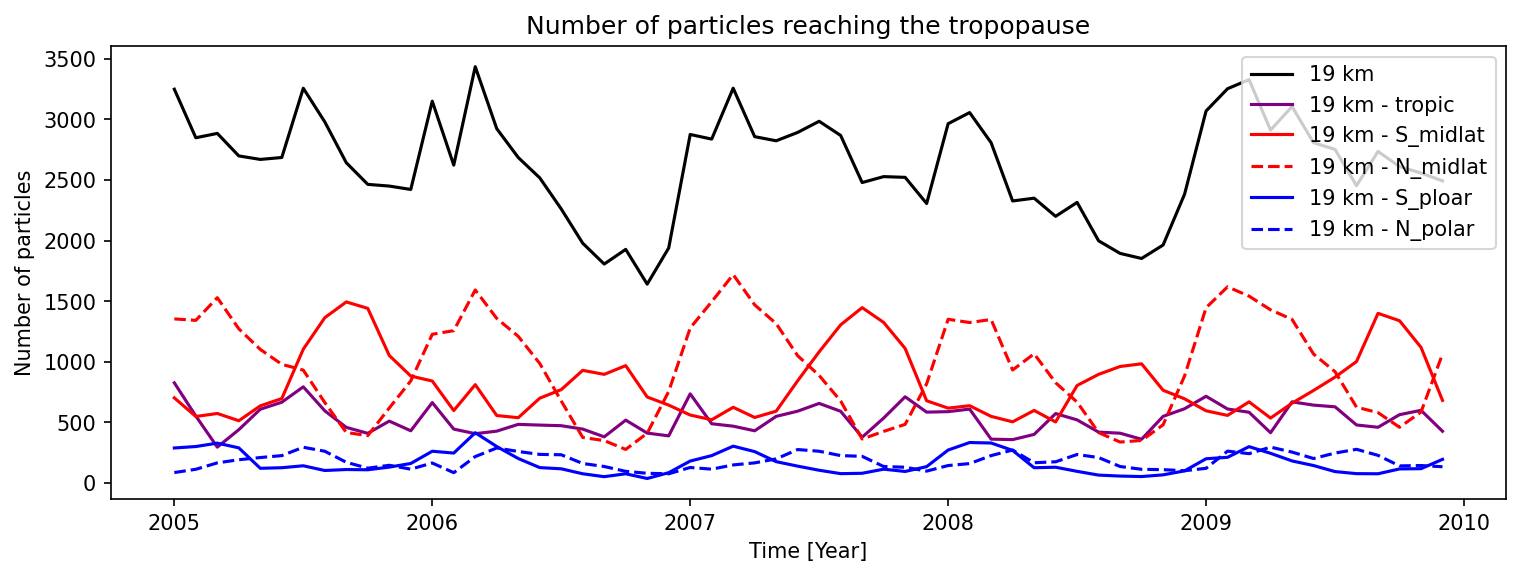

In [16]:
#
fig = plt.figure(figsize=(12,4), dpi=150)

imon_begin = 5*12
imon_end = 10*12

sink_num_month_5yr = sink_num_month[imon_begin:imon_end]
sink_num_month_tropic_5yr = sink_num_month_tropic[imon_begin:imon_end]
sink_num_month_S_midlat_5yr = sink_num_month_S_midlat[imon_begin:imon_end]
sink_num_month_N_midlat_5yr = sink_num_month_N_midlat[imon_begin:imon_end]
sink_num_month_S_polar_5yr = sink_num_month_S_polar[imon_begin:imon_end]
sink_num_month_N_polar_5yr = sink_num_month_N_polar[imon_begin:imon_end]

plt.plot(sink_num_month[imon_begin:imon_end], 'k', label=f"19 km")
plt.plot(sink_num_month_tropic[imon_begin:imon_end], 'purple', label=f"19 km - tropic")
plt.plot(sink_num_month_S_midlat[imon_begin:imon_end], 'r-', label=f"19 km - S_midlat")
plt.plot(sink_num_month_N_midlat[imon_begin:imon_end], 'r--', label=f"19 km - N_midlat")
plt.plot(sink_num_month_S_polar[imon_begin:imon_end], 'b-', label=f"19 km - S_ploar")
plt.plot(sink_num_month_N_polar[imon_begin:imon_end], 'b--', label=f"19 km - N_polar")

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Time [Year]")
plt.ylabel("Number of particles")
plt.title("Number of particles reaching the tropopause")

plt.xticks(np.arange(0,5*12+1,12), ['2005', '2006', '2007', '2008', '2009', '2010'], rotation=0) 

plt.legend();

In [17]:
  
##### detrand
sink_num_month_5yr_detrend = Signal.detrend(sink_num_month_5yr)

# deseasonal
N_total = len(sink_num_month_5yr_detrend)
sink_num_month_5yr_detrend_deseason = 0.0*sink_num_month_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_5yr_detrend_deseason[idx] = sink_num_month_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_5yr_detrend[idx2:N_total:12])
    

##### detrand
sink_num_month_tropic_5yr_detrend = Signal.detrend(sink_num_month_tropic_5yr)

# deseasonal
N_total = len(sink_num_month_tropic_5yr_detrend)
sink_num_month_tropic_5yr_detrend_deseason = 0.0*sink_num_month_tropic_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_tropic_5yr_detrend_deseason[idx] = sink_num_month_tropic_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_tropic_5yr_detrend[idx2:N_total:12])
    
    

##### detrand
sink_num_month_S_midlat_5yr_detrend = Signal.detrend(sink_num_month_S_midlat_5yr)

# deseasonal
N_total = len(sink_num_month_S_midlat_5yr_detrend)
sink_num_month_S_midlat_5yr_detrend_deseason = 0.0*sink_num_month_S_midlat_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_S_midlat_5yr_detrend_deseason[idx] = sink_num_month_S_midlat_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_S_midlat_5yr_detrend[idx2:N_total:12])
    

# detrand
sink_num_month_N_midlat_5yr_detrend = Signal.detrend(sink_num_month_N_midlat_5yr)

# deseasonal
N_total = len(sink_num_month_N_midlat_5yr_detrend)
sink_num_month_N_midlat_5yr_detrend_deseason = 0.0*sink_num_month_N_midlat_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_N_midlat_5yr_detrend_deseason[idx] = sink_num_month_N_midlat_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_N_midlat_5yr_detrend[idx2:N_total:12])
    
    
    
##### detrand
sink_num_month_S_polar_5yr_detrend = Signal.detrend(sink_num_month_S_polar_5yr)

# deseasonal
N_total = len(sink_num_month_S_polar_5yr_detrend)
sink_num_month_S_polar_5yr_detrend_deseason = 0.0*sink_num_month_S_polar_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_S_polar_5yr_detrend_deseason[idx] = sink_num_month_S_polar_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_S_polar_5yr_detrend[idx2:N_total:12])
    

# detrand
sink_num_month_N_polar_5yr_detrend = Signal.detrend(sink_num_month_N_polar_5yr)
print(sink_num_month_N_polar_5yr_detrend.shape)

# deseasonal
N_total = len(sink_num_month_N_polar_5yr_detrend)
sink_num_month_N_polar_5yr_detrend_deseason = 0.0*sink_num_month_N_polar_5yr_detrend

for idx in range(N_total):
    idx2 = idx % 12
    sink_num_month_N_polar_5yr_detrend_deseason[idx] = sink_num_month_N_polar_5yr_detrend[idx] \
                                         - np.mean(sink_num_month_N_polar_5yr_detrend[idx2:N_total:12])
    

(60,)


In [18]:
# QBO for singapore obs data:
# https://acd-ext.gsfc.nasa.gov/Data_services/met/qbo/QBO_Singapore_Uvals_GSFC.txt
df = pd.read_fwf('../QBO_Singapore_index.txt', sep=" ")

# get 2005.1 - 2009.12
idx1 = (2005-1979)*12
df2 = df.iloc[idx1:idx1+5*12]

df2.head()

,Month,Year,100,90,80,70,50,40,30,20,15,10
312,1,2005,-2.53,-1.13,-2.62,0.50,5.38,9.65,-1.64,-28.39,-28.37,-25.98
313,2,2005,2.60,0.68,-0.35,1.95,9.88,11.87,1.67,-29.76,-30.79,-31.41
314,3,2005,-8.15,-4.47,1.75,7.71,14.51,15.05,-1.02,-29.72,-33.98,-34.78
315,4,2005,-0.50,-0.18,0.88,2.79,8.16,5.73,-18.22,-32.82,-34.12,-35.27
316,5,2005,-9.23,-8.89,-0.62,6.73,8.36,-8.09,-26.69,-33.13,-34.52,-37.37


[1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0, 1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
[[1.         0.52576797]
 [0.52576797 1.        ]]
[[1.         0.41418681]
 [0.41418681 1.        ]]
[[1.         0.36798204]
 [0.36798204 1.        ]]
[[1.         0.19576136]
 [0.19576136 1.        ]]
[[1.         0.32589838]
 [0.32589838 1.        ]]
[[1.         0.32589838]
 [0.32589838 1.        ]]


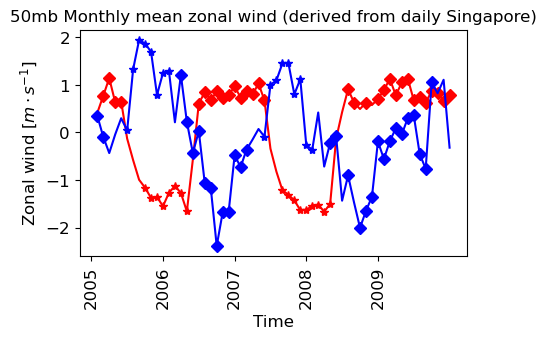

In [88]:
U50 = df2['50']

month = np.arange(1,len(U50)+1,1)

fig = plt.figure(figsize=(5,3),dpi=100)

data50 = (U50 - np.mean(U50))/np.std(U50)

data2 = (sink_num_month_S_midlat_5yr_detrend_deseason - np.mean(sink_num_month_S_midlat_5yr_detrend_deseason))/np.std(sink_num_month_S_midlat_5yr_detrend_deseason)

res1 = [idx for idx, val in enumerate(data50) if val > 0.6]
res2 = [idx for idx, val in enumerate(data50) if val < -1.0]

res11 = [x-3 for x in res1 if x>=3]
res22 = [x-3 for x in res2 if x>=3]

print(res1)
print(res11)
data50 = data50.values

plt.plot(month, data50, 'r-')
plt.plot(month[res1], data50[res1], 'rD')
plt.plot(month[res2], data50[res2], 'r*')

plt.plot(month, data2, 'b-')
plt.plot(month[res11], data2[res11], 'bD')
plt.plot(month[res22], data2[res22], 'b*')

tick_locs = np.arange(0,len(month),12)
tick_lbls = np.arange(2005,2010,1)
plt.xticks(tick_locs, tick_lbls, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)


plt.title('50mb Monthly mean zonal wind (derived from daily Singapore)', fontsize=12)
plt.ylabel('Zonal wind [$m \cdot s^{-1}$]', fontsize=12)
plt.xlabel('Time', fontsize=12)
# plt.legend(loc='lower left');

D_mon = 7
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_5yr[D_mon:60]))
D_mon = 7
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_tropic_5yr[D_mon:60]))
D_mon = 6
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_S_midlat_5yr[D_mon:60]))
D_mon = 10
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_N_midlat_5yr[D_mon:60]))
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_S_polar_5yr[D_mon:60]))
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_S_polar_5yr[D_mon:60]))


In [20]:
D_mon = 7
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_5yr_detrend_deseason[D_mon:60]))

[[1.         0.80611027]
 [0.80611027 1.        ]]


In [21]:
D_mon = 7
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_tropic_5yr_detrend_deseason[D_mon:60]))

[[1.         0.55969369]
 [0.55969369 1.        ]]


In [92]:
D_mon = 4
print(np.corrcoef(U50[D_mon:60], sink_num_month_S_midlat_5yr_detrend_deseason[0:60-D_mon]))
print(np.corrcoef(U50[D_mon:60], sink_num_month_N_midlat_5yr_detrend_deseason[0:60-D_mon]))
D_mon = 6
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_N_midlat_5yr_detrend_deseason[D_mon:60]))

[[ 1.         -0.67865727]
 [-0.67865727  1.        ]]
[[ 1.         -0.12031004]
 [-0.12031004  1.        ]]
[[1.        0.6751659]
 [0.6751659 1.       ]]


In [23]:
D_mon = 11
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_S_polar_5yr_detrend_deseason[D_mon:60]))
D_mon = 11
print(np.corrcoef(U50[0:60-D_mon], sink_num_month_N_polar_5yr_detrend_deseason[D_mon:60]))

[[1.         0.65473862]
 [0.65473862 1.        ]]
[[1.         0.36477725]
 [0.36477725 1.        ]]


## Figure 4: particle numbers at different sink location

In [24]:
# Sink_num = np.zeros((N_lat, N_lon, N_lev, Total_Mon))

i_mon1 = 5*12
i_mon2 = 10*12

Sink_num_5yr = np.sum(Sink_num[:,:,:,5*12:10*12],axis=2)


In [25]:
Total_Mon

240

(30, 36)


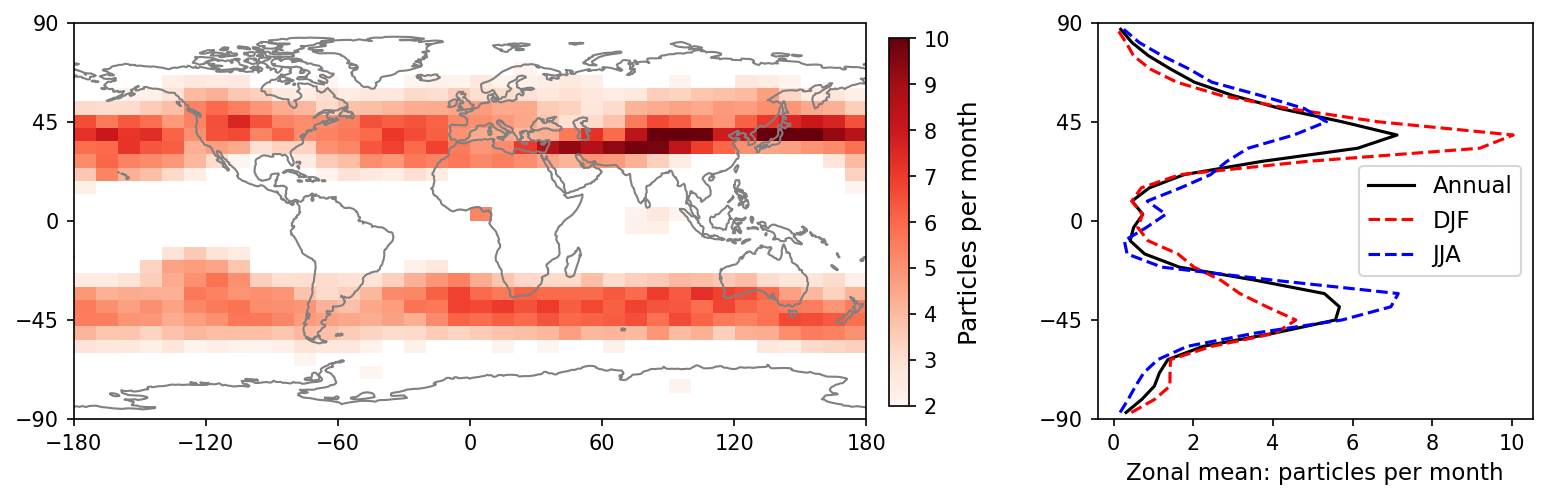

In [26]:
from copy import copy

iz = 2
i_mon1 = 0
i_mon2 = Total_Mon

fig = plt.figure(figsize=(13,3.5), dpi=150)
gs = gridspec.GridSpec(1, 10, figure=fig)
projection = crs.PlateCarree()

Num_min = 2
Num_max = 10
extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(gs[0, 0:6], projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)

data = np.mean( Sink_num_5yr[:,:,:], axis=2 )
ax1_pixel = plt.imshow(data, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

cax = fig.add_axes([0.57, 0.15, 0.01, 0.7])    
cb1 = plt.colorbar(ax1_pixel, cax=cax, ax=ax1, orientation="vertical")
# cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation="horizontal")

cb1.set_label('Particles per month', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

# ax1.set_title("Number of particles sinking in the tropopause");

print(data.shape)


###
ax2 = fig.add_subplot(gs[0, 7:10])

data_all = np.mean( Sink_num_5yr[:,:,:], axis=(1,2) )

data_DJF = ( np.mean(Sink_num_5yr[:,:,11:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,0:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,1:-1:12], axis=(1,2)) )/3

data_MAM = ( np.mean(Sink_num_5yr[:,:,2:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,3:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,4:-1:12], axis=(1,2)) )/3

data_JJA = ( np.mean(Sink_num_5yr[:,:,5:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,6:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,7:-1:12], axis=(1,2)) )/3

data_SON = ( np.mean(Sink_num_5yr[:,:,8:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,9:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,10:-1:12], axis=(1,2)) )/3



ax2.plot(data_all[:], Lats_mid, 'k-',  label="Annual")
ax2.plot(data_DJF[:], Lats_mid, 'r--', label="DJF")
# ax2.plot(data_MAM[:], Lats_mid, 'b--', label="MAM")
ax2.plot(data_JJA[:], Lats_mid, 'b--', label="JJA")
# ax2.plot(data_SON[:], Lats_mid, 'y--', label="SON")

ax2.set_ylim(-90,90)
ax2.set_yticks((-90,-45,0,45,90))
# ax2.set_yticklabels(-90,-45,0,45,90)

ax2.set_xlabel("Zonal mean: particles per month", fontsize=11);
# ax2.set_title("Zonal mean of sinks");

ax2.legend(fontsize=11, loc='center right');
# plt.tight_layout()

(30, 36)
Copy the colorbar from the above figure!


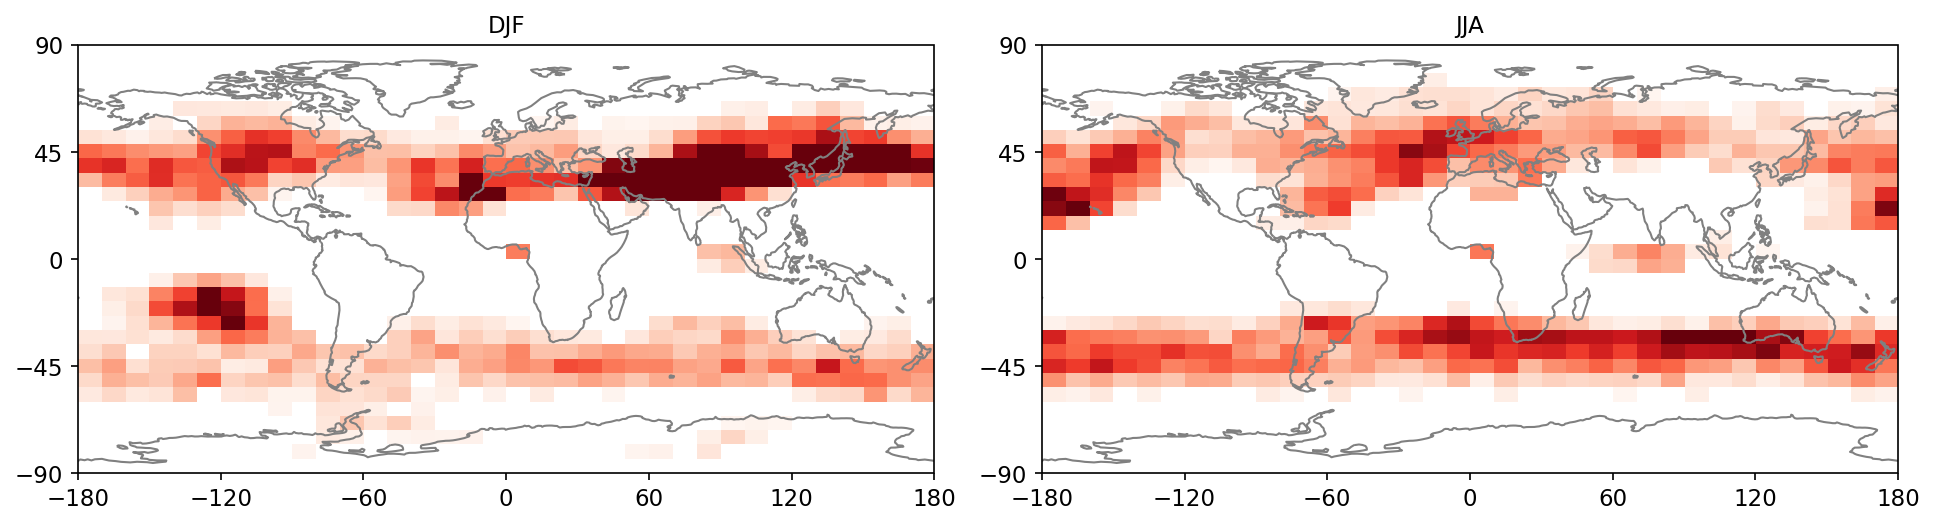

In [27]:
fig = plt.figure(figsize=(13,3.5), dpi=150)
gs = gridspec.GridSpec(1, 11, figure=fig)
projection = crs.PlateCarree()


extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(1,2,1, projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_DJF = ( np.mean(Sink_num_5yr[:,:,11:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,0:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,1:-1:12], axis=(2)) )/3

ax1_pixel = plt.imshow(data_DJF, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[Number of Particles]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.tick_params(labelsize=11)

ax1.set_title("DJF", fontsize=11);

print(data.shape)



###
ax3 = fig.add_subplot(1,2,2, projection=projection)

ax3.set_global()
ax3.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_JJA = ( np.mean(Sink_num_5yr[:,:,5:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,6:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,7:-1:12], axis=(2)) )/3

ax3_pixel = plt.imshow(data_JJA, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

# levels = 
# extent=extent
# ax3_contour = plt.contour(U200_5yr_DJF_mean, colors='k', linestyles='dashed')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[Number of Particles]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax3.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax3.tick_params(labelsize=11)

ax3.set_title("JJA", fontsize=11);

plt.tight_layout()


print("Copy the colorbar from the above figure!")

# 200 hPa wind speed

In [28]:

ds = xr.open_dataset('./U200_2005-2009.nc')

U200 = ds["u"]
y_lat = ds["latitude"]
x_lon = ds["longitude"]

X, Y = np.meshgrid(x_lon, y_lat)

U200_5yr = U200[0:12*5,:,:]

U200_5yr_Mean = np.mean(U200_5yr, axis=0)

a = U200_5yr[1:12*5:12,:,:]

U200_5yr_DJF_mean = ( np.mean(U200_5yr[0:12*5:12,:,:], axis=0) \
                     +np.mean(U200_5yr[1:12*5:12,:,:], axis=0) \
                     +np.mean(U200_5yr[11:12*5:12,:,:], axis=0))/3

U200_5yr_JJA_mean = ( np.mean(U200_5yr[5:12*5:12,:,:], axis=0) \
                     +np.mean(U200_5yr[6:12*5:12,:,:], axis=0) \
                     +np.mean(U200_5yr[7:12*5:12,:,:], axis=0))/3

U200_5yr_JJA_mean.shape

(721, 1440)

In [29]:
Sink_num_5yr.shape, Grid_area.shape

((30, 36, 60), (30, 36))

(30, 36)


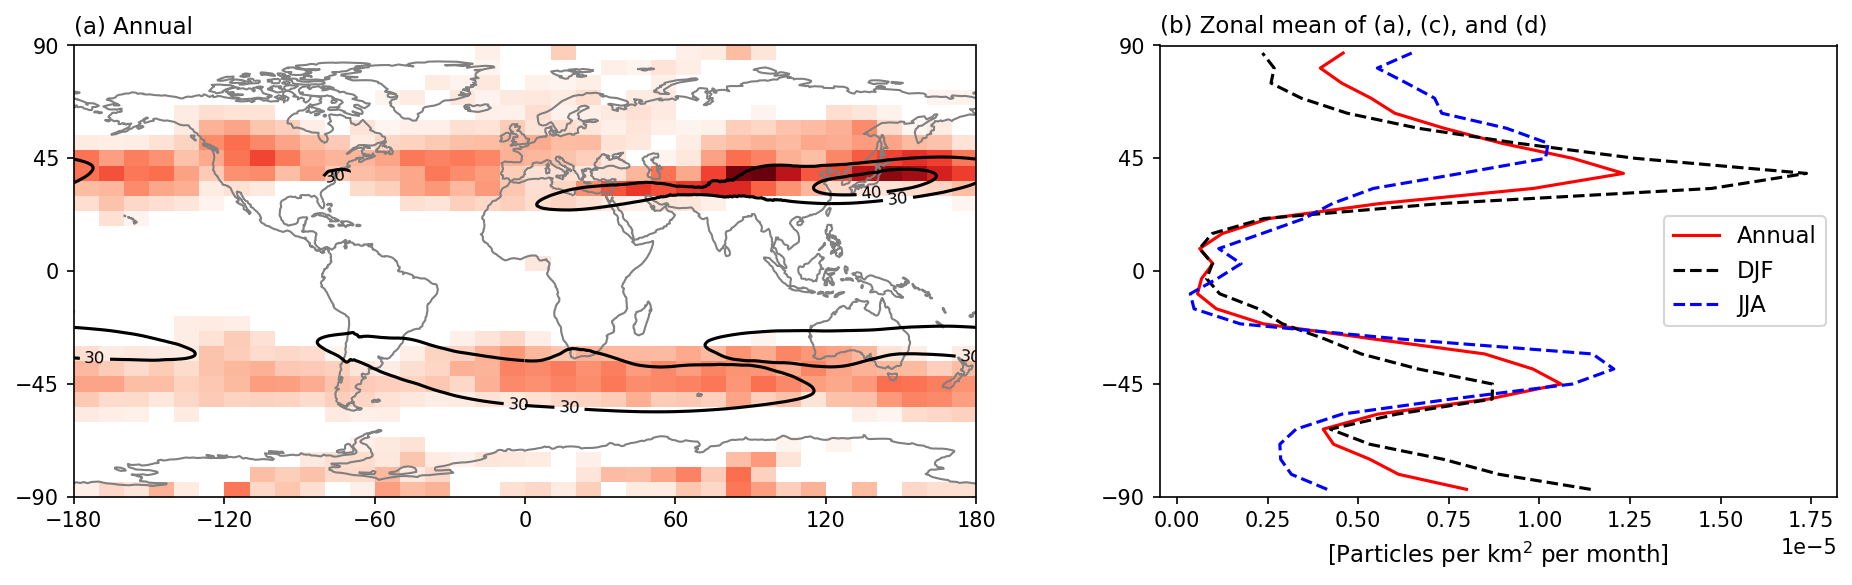

In [43]:

iz = 2
i_mon1 = 0
i_mon2 = Total_Mon

fig = plt.figure(figsize=(13,4), dpi=150)
gs = gridspec.GridSpec(1, 10, figure=fig)
projection = crs.PlateCarree()

Num_min = 6e-6
Num_max = 20e-6
extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(gs[0, 0:6], projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)

data = np.mean( Sink_num_5yr[:,:,:], axis=2 ) / Grid_area[:,:] # particles per km^2 per month
ax1_pixel = plt.imshow(data, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')


levels = [30,40]
ax1_contour = plt.contour(X, Y, U200_5yr_Mean, levels=levels, colors='k', linestyles='solid')
ax1.clabel(ax1_contour, inline=True, fmt='%.0f', fontsize=8)

# cax = fig.add_axes([0.57, 0.15, 0.01, 0.7])    
# cb1 = plt.colorbar(ax1_pixel, cax=cax, ax=ax1, orientation="vertical")
## cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation="horizontal")
# cb1.set_label('Particles flux', fontsize=11);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.set_title("(a) Annual", loc='left', fontsize=11);
# ax1.set_title("Annual", loc='center', fontsize=11);

print(data.shape)


###
ax2 = fig.add_subplot(gs[0, 6:10])

data_all = np.mean( Sink_num_5yr[:,:,:], axis=(1,2) ) 

data_DJF = ( np.mean(Sink_num_5yr[:,:,11:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,0:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,1:-1:12], axis=(1,2)) )/3 

data_MAM = ( np.mean(Sink_num_5yr[:,:,2:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,3:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,4:-1:12], axis=(1,2)) )/3 

data_JJA = ( np.mean(Sink_num_5yr[:,:,5:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,6:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,7:-1:12], axis=(1,2)) )/3 

data_SON = ( np.mean(Sink_num_5yr[:,:,8:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,9:-1:12], axis=(1,2))
            +np.mean(Sink_num_5yr[:,:,10:-1:12], axis=(1,2)) )/3



ax2.plot(data_all[:]/ Grid_area[:,0], Lats_mid, 'r-',  label="Annual")
ax2.plot(data_DJF[:]/ Grid_area[:,0], Lats_mid, 'k--', label="DJF")
# ax2.plot(data_MAM[:], Lats_mid, 'b--', label="MAM")
ax2.plot(data_JJA[:]/ Grid_area[:,0], Lats_mid, 'b--', label="JJA")
# ax2.plot(data_SON[:], Lats_mid, 'y--', label="SON")

ax2.set_ylim(-90,90)
ax2.set_yticks((-90,-45,0,45,90))
# ax2.set_yticklabels(-90,-45,0,45,90)

ax2.set_xlabel(f"[Particles per km$^2$ per month]", fontsize=11);
ax2.set_title("(b) Zonal mean of (a), (c), and (d)", loc='left', fontsize=11);

ax2.legend(fontsize=11, loc='center right');
plt.tight_layout()


(30, 36)
Copy the colorbar from the above figure!


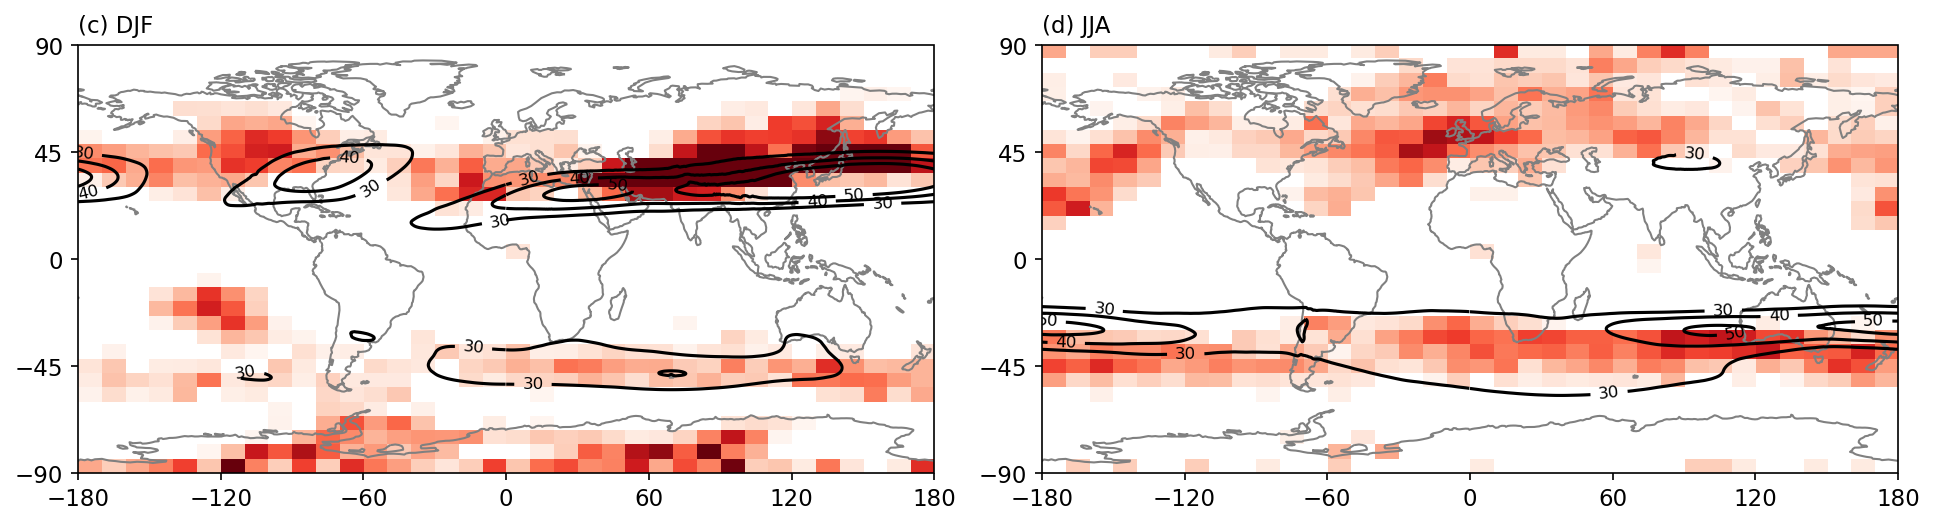

In [44]:

fig = plt.figure(figsize=(13,4), dpi=150)
gs = gridspec.GridSpec(1, 11, figure=fig)
projection = crs.PlateCarree()

extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(1,2,1, projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_DJF = ( np.mean(Sink_num_5yr[:,:,11:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,0:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,1:-1:12], axis=(2)) )/3 /Grid_area[:,:] # particles per km^2 per month

ax1_pixel = plt.imshow(data_DJF, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[Number of Particles]', fontsize=12);


levels = [30,40,50]
ax1_contour = plt.contour(X, Y, U200_5yr_DJF_mean, levels=levels, colors='k', linestyles='solid')
ax1.clabel(ax1_contour, inline=True, fmt='%.0f', fontsize=8)

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.tick_params(labelsize=11)

# ax1.set_title("DJF", fontsize=11, loc='center');
ax1.set_title("(c) DJF", fontsize=11, loc='left');

print(data.shape)


###
ax3 = fig.add_subplot(1,2,2, projection=projection)

ax3.set_global()
ax3.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_JJA = ( np.mean(Sink_num_5yr[:,:,5:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,6:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,7:-1:12], axis=(2)) )/3 /Grid_area[:,:] # particles per km^2 per month

ax3_pixel = plt.imshow(data_JJA, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')
# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[Number of Particles]', fontsize=12);

levels = [30,40,50]
ax3_contour = plt.contour(X, Y, U200_5yr_JJA_mean, levels=levels, colors='k', linestyles='solid')
ax3.clabel(ax3_contour, inline=True, fmt='%.0f', fontsize=8)

ax3.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax3.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax3.tick_params(labelsize=11)

# ax3.set_title("JJA", fontsize=11, loc='center');
ax3.set_title("(d) JJA", fontsize=11, loc='left');

plt.tight_layout()

print("Copy the colorbar from the above figure!")


(30, 36)


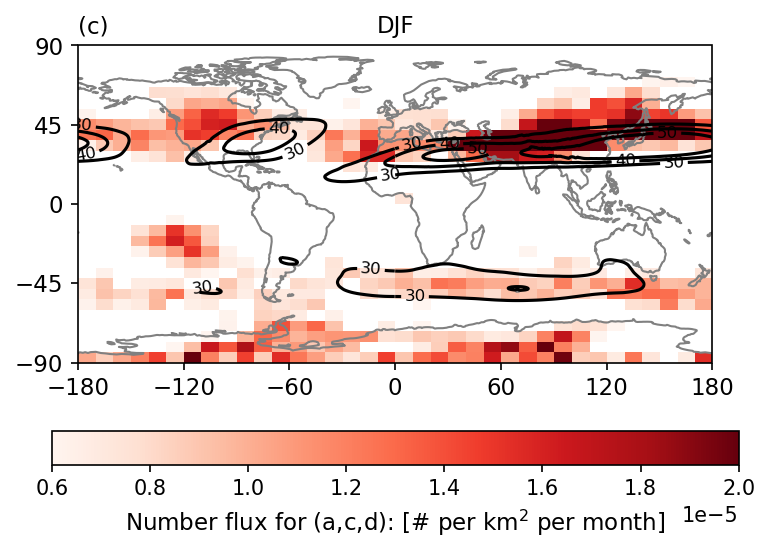

In [39]:

fig = plt.figure(figsize=(13,4), dpi=150)
gs = gridspec.GridSpec(1, 11, figure=fig)
projection = crs.PlateCarree()


extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(1,2,1, projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_DJF = ( np.mean(Sink_num_5yr[:,:,11:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,0:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,1:-1:12], axis=(2)) )/3 /Grid_area[:,:] # particles per km^2 per month

ax1_pixel = plt.imshow(data_DJF, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation="horizontal")
cb1.set_label(f'Number flux for (a,c,d): [# per km$^2$ per month]', fontsize=11);


levels = [30,40,50]
ax1_contour = plt.contour(X, Y, U200_5yr_DJF_mean, levels=levels, colors='k', linestyles='solid')
ax1.clabel(ax1_contour, inline=True, fmt='%.0f', fontsize=8)



ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.tick_params(labelsize=11)

ax1.set_title("DJF", fontsize=11, loc='center');
ax1.set_title("(c)", fontsize=11, loc='left');

print(data.shape)

# Cluster analysis for different QBO phases

(30, 36)
Copy the colorbar from the above figure!


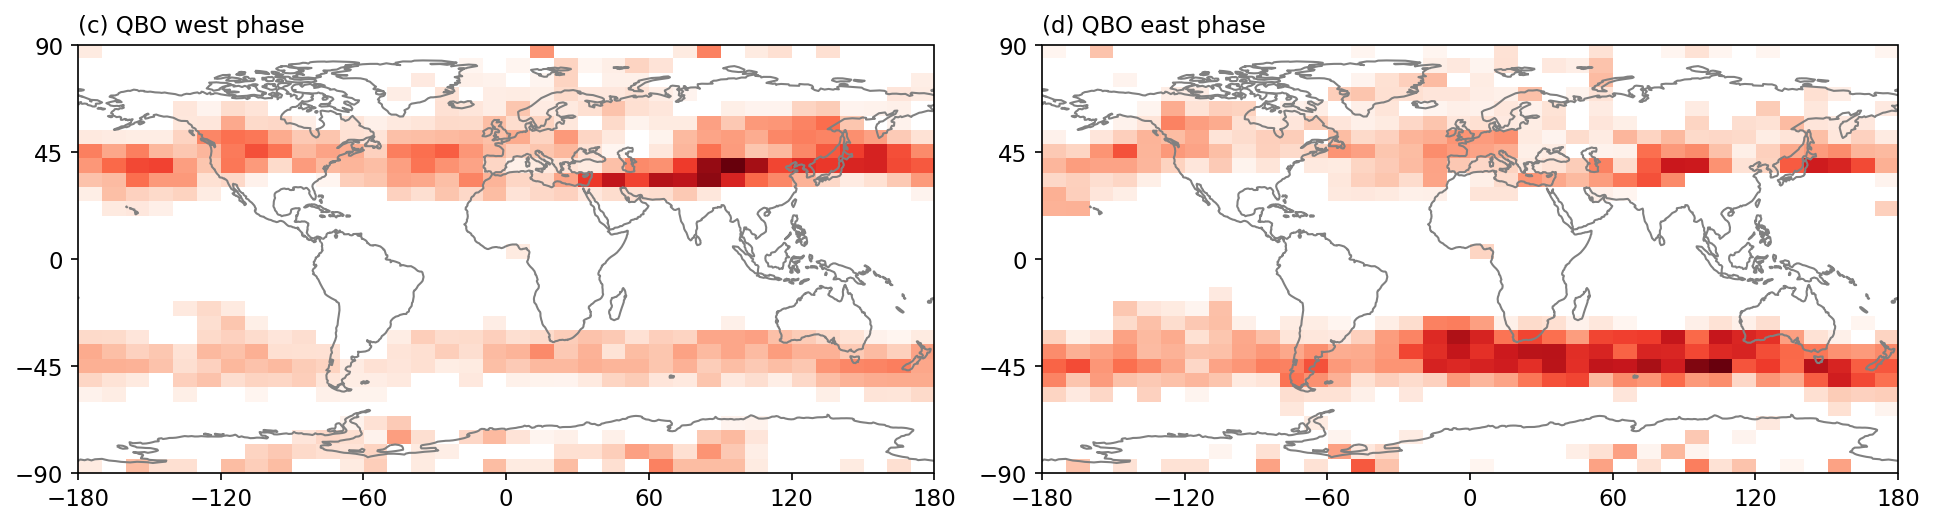

In [90]:
fig = plt.figure(figsize=(13,4), dpi=150)
gs = gridspec.GridSpec(1, 11, figure=fig)
projection = crs.PlateCarree()

extent = [-180 , 180 , 90 , -90]

# plt.plot(month[res11], data2[res11], 'bD')
# plt.plot(month[res22], data2[res22], 'b*')

###
ax1 = fig.add_subplot(1,2,1, projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_DJF = np.mean(Sink_num_5yr[:,:,res11], axis=(2)) / Grid_area[:,:] # particles per km^2 per month

ax1_pixel = plt.imshow(data_DJF, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[Number of Particles]', fontsize=12);


# levels = [30,40,50]
# ax1_contour = plt.contour(X, Y, U200_5yr_DJF_mean, levels=levels, colors='k', linestyles='solid')
# ax1.clabel(ax1_contour, inline=True, fmt='%.0f', fontsize=8)

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.tick_params(labelsize=11)

# ax1.set_title("DJF", fontsize=11, loc='center');
ax1.set_title("(c) QBO west phase", fontsize=11, loc='left');

print(data.shape)


###
ax3 = fig.add_subplot(1,2,2, projection=projection)

ax3.set_global()
ax3.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_JJA = np.mean(Sink_num_5yr[:,:,res22], axis=(2)) / Grid_area[:,:] # particles per km^2 per month

ax3_pixel = plt.imshow(data_JJA, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')
# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[Number of Particles]', fontsize=12);

# levels = [30,40,50]
# ax3_contour = plt.contour(X, Y, U200_5yr_JJA_mean, levels=levels, colors='k', linestyles='solid')
# ax3.clabel(ax3_contour, inline=True, fmt='%.0f', fontsize=8)

ax3.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax3.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax3.tick_params(labelsize=11)

# ax3.set_title("JJA", fontsize=11, loc='center');
ax3.set_title("(d) QBO east phase", fontsize=11, loc='left');

plt.tight_layout()

print("Copy the colorbar from the above figure!")

# Stop here

In [ ]:
fig = plt.figure(figsize=(13,7), dpi=150)
gs = gridspec.GridSpec(1, 11, figure=fig)
projection = crs.PlateCarree()


extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(2,2,1, projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_DJF = ( np.mean(Sink_num_5yr[:,:,11:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,0:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,1:-1:12], axis=(2)) )/3

ax1_pixel = plt.imshow(data_DJF, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[Number of Particles]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.tick_params(labelsize=11)

ax1.set_title("DJF", fontsize=11);

print(data.shape)


###
ax2 = fig.add_subplot(2,2,2, projection=projection)

ax2.set_global()
ax2.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_MAM = ( np.mean(Sink_num_5yr[:,:,2:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,3:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,4:-1:12], axis=(2)) )/3

ax2_pixel = plt.imshow(data_MAM, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[Number of Particles]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax2.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax2.tick_params(labelsize=11)

ax2.set_title("MAM", fontsize=11);


###
ax3 = fig.add_subplot(2,2,3, projection=projection)

ax3.set_global()
ax3.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_JJA = ( np.mean(Sink_num_5yr[:,:,5:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,6:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,7:-1:12], axis=(2)) )/3

ax3_pixel = plt.imshow(data_JJA, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[Number of Particles]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax3.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax3.tick_params(labelsize=11)

ax3.set_title("JJA", fontsize=11);



###
ax4 = fig.add_subplot(2,2,4, projection=projection)

ax4.set_global()
ax4.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

data_SON = ( np.mean(Sink_num_5yr[:,:,8:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,9:-1:12], axis=(2))
            +np.mean(Sink_num_5yr[:,:,10:-1:12], axis=(2)) )/3

ax4_pixel = plt.imshow(data_SON, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4)
cb4.set_label('[Number of Particles]', fontsize=12);

ax4.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax4.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax4.tick_params(labelsize=11)

ax4.set_title("SON", fontsize=11);

plt.tight_layout()



In [ ]:
np.sum(Sink_num, axis=(0,1,2,3))/10/12/10/6/24


In [21]:
Sink_num.shape

(30, 36, 7, 240)

(30, 36)


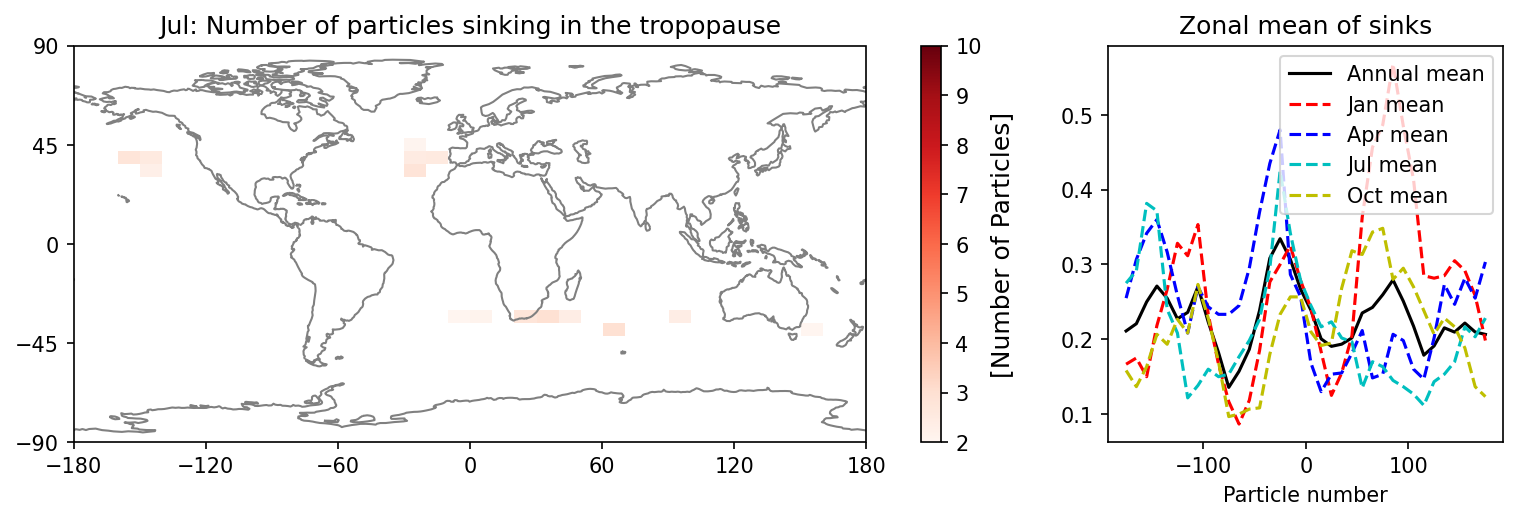

In [22]:
fig = plt.figure(figsize=(13,3.5), dpi=150)
gs = gridspec.GridSpec(1, 11, figure=fig)
projection = crs.PlateCarree()


extent = [-180 , 180 , 90 , -90]

###
ax1 = fig.add_subplot(gs[0, 0:8], projection=projection)

ax1.set_global()
ax1.set_extent([-180, 180, 90, -90], crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

data = np.mean( Sink_num[:,:,iz,i_mon1+6:i_mon2:12], axis=2 )
ax1_pixel = plt.imshow(data, vmin=Num_min, vmax=Num_max,\
           extent = extent, cmap=palette, interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[Number of Particles]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=projection)

ax1.set_title("Jul: Number of particles sinking in the tropopause");

print(data.shape)


###
ax2 = fig.add_subplot(gs[0, 8:11])

data_all = np.mean( Sink_num[:,:,iz,i_mon1:i_mon2], axis=(0,2) )
data_Jan = np.mean( Sink_num[:,:,iz,i_mon1:i_mon2:12], axis=(0,2))
data_Apr = np.mean( Sink_num[:,:,iz,i_mon1+3:i_mon2:12], axis=(0,2))
data_Jul = np.mean( Sink_num[:,:,iz,i_mon1+6:i_mon2:12], axis=(0,2))
data_Oct = np.mean( Sink_num[:,:,iz,i_mon1+9:i_mon2:12], axis=(0,2))

ax2.plot(Lons_mid, data_all[:],  'k-', label="Annual mean")
ax2.plot(Lons_mid, data_Jan[:], 'r--', label="Jan mean")
ax2.plot(Lons_mid, data_Apr[:], 'b--', label="Apr mean")
ax2.plot(Lons_mid, data_Jul[:], 'c--', label="Jul mean")
ax2.plot(Lons_mid, data_Oct[:], 'y--', label="Oct mean")

# ax2.set_ylim(-90,90)
# ax2.set_yticks((-90,-45,0,45,90))
# ax2.set_yticklabels(-90,-45,0,45,90)

ax2.set_xlabel("Particle number");
ax2.set_title("Zonal mean of sinks");

ax2.legend();